In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
dataset = pd.read_csv("IMDb Movies India.csv", encoding='latin1')


In [43]:
dataset.shape

(15509, 10)

In [44]:
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [46]:
dataset.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [47]:
dataset.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [48]:
dataset.dropna(subset=["Rating"], inplace=True)

In [49]:
dataset.isnull().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [50]:
dataset.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre'],inplace=True)

In [51]:
dataset.isnull().sum()

Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [52]:
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [53]:
dataset['Votes'] = dataset['Votes'].astype(str).str.replace(',', '').astype(int)

In [62]:
dataset['Year'] = dataset['Year'].astype(str).str.replace(r'[()]', '', regex=True).astype(int)


In [63]:
dataset['Duration'] = dataset['Duration'].astype(str).str.replace('min', '').str.strip()
dataset['Duration'] = dataset['Duration'].astype(float)
dataset['Duration'] = dataset['Duration'].fillna(dataset['Duration'].median())



In [64]:
dataset.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int32  
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int32  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), int32(2), object(6)
memory usage: 590.5+ KB


In [66]:
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [67]:
top_movie = dataset.loc[dataset['Rating'].sort_values(ascending=False)[:10].index]

In [68]:
print(top_movie)

                      Name  Year  Duration                   Genre  Rating  \
8339       Love Qubool Hai  2020      94.0          Drama, Romance    10.0   
5410            Half Songs  2021      79.0          Music, Romance     9.7   
2563                 Breed  2020     135.0                   Drama     9.6   
14222  The Reluctant Crime  2020     113.0                   Drama     9.4   
5077          Gho Gho Rani  2019     105.0        History, Romance     9.4   
6852                  June  2021      93.0                   Drama     9.4   
12673   Secrets of Sinauli  2021      56.0    Documentary, History     9.3   
5125           God of gods  2019      90.0             Documentary     9.3   
8344          Love Sorries  2021     101.0  Comedy, Drama, Romance     9.3   
1314          Ashok Vatika  2018      97.0                   Drama     9.3   

       Votes         Director            Actor 1          Actor 2  \
8339       5  Saif Ali Sayeed          Ahaan Jha   Mahesh Narayan   
541

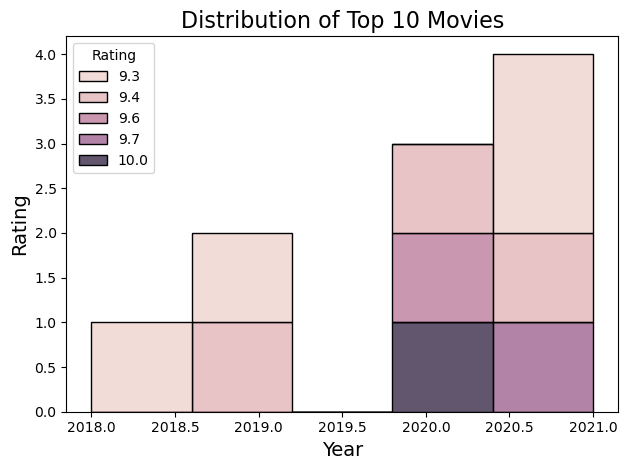

In [69]:
sns.histplot(data=top_movie, x="Year",hue="Rating", multiple="stack")
plt.title('Distribution of Top 10 Movies', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.tight_layout()
plt.show()

In [72]:
genre_counts = dataset['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

top_n_genres = genre_counts.head(5)
top_n_genres

,Genre,Count
0,Drama,1137
1,"Drama, Romance",443
2,"Action, Crime, Drama",417
3,Action,391
4,"Drama, Family",291


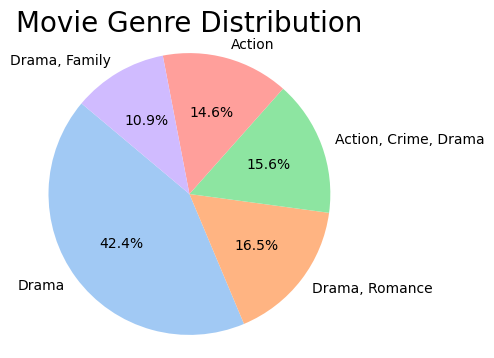

In [73]:
plt.figure(figsize=(4, 4))
plt.pie(top_n_genres['Count'], labels=top_n_genres['Genre'], autopct='%1.1f%%', startangle=140,colors=sns.color_palette('pastel'))
plt.title('Movie Genre Distribution',fontsize=20)
plt.axis('equal')
plt.show()
     

In [74]:
director_avg_rating = dataset.groupby('Director')['Rating'].mean().reset_index()

director_avg_rating = director_avg_rating.sort_values(by='Rating', ascending=False)

top_directors = director_avg_rating.head(10)
print(top_directors)
     


             Director  Rating
2243  Saif Ali Sayeed    10.0
2560      Sriram Raja     9.7
504       Bobby Kumar     9.6
322     Arvind Pratap     9.4
1513     Munni Pankaj     9.4
2598   Suhrud Godbole     9.4
1601     Nikhil Mahar     9.3
2809     Venkatesh Bk     9.3
1879    Rahul Mallick     9.3
1864   Raghav Jairath     9.3


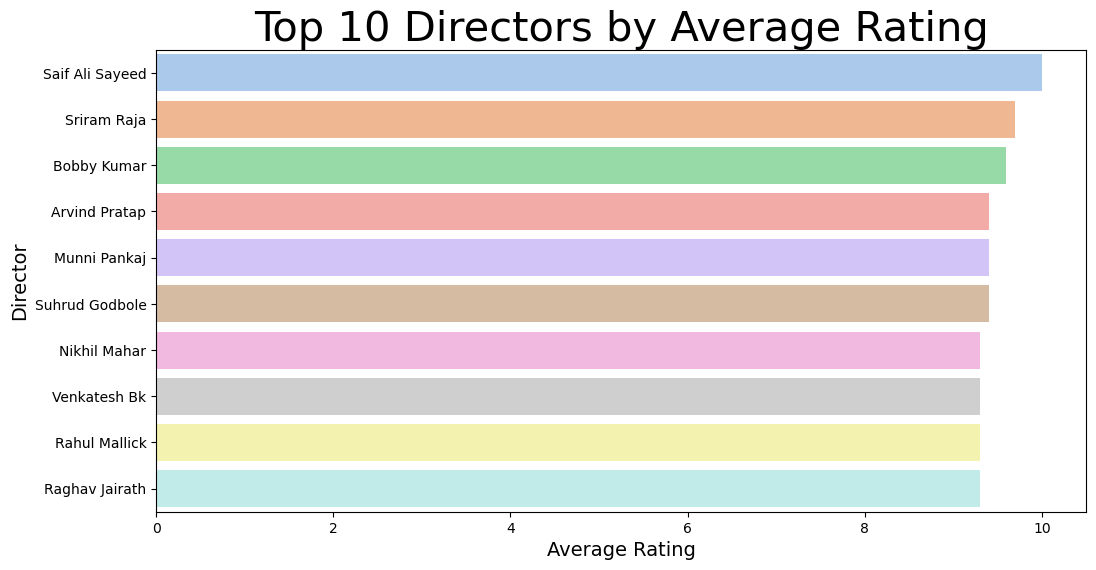

In [75]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_directors, x='Rating', y='Director', palette='pastel', hue='Director', legend=False)
plt.title('Top 10 Directors by Average Rating', fontsize=30)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Director', fontsize=14)  # Adjusted fontsize for better appearance

plt.show()

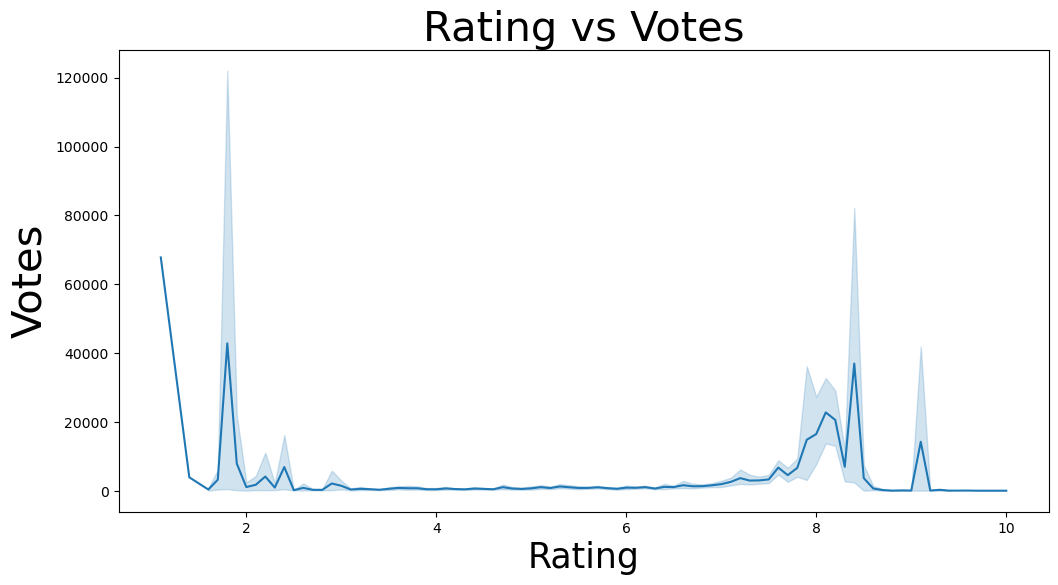

In [77]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dataset, x='Rating', y='Votes')
plt.title('Rating vs Votes', fontsize=30)
plt.xlabel('Rating', fontsize=25)
plt.ylabel('Votes', fontsize=30)
plt.show()

In [78]:
actor_counts = dataset['Actor 1'].value_counts().reset_index()
actor_counts.columns = ['Actor', 'MovieCount']

top_n_actors = actor_counts.head(10)
print(top_n_actors)
     

                Actor  MovieCount
0           Jeetendra         140
1          Dharmendra         134
2  Mithun Chakraborty         130
3         Ashok Kumar         125
4       Rajesh Khanna         118
5    Amitabh Bachchan         116
6           Dev Anand          90
7       Shashi Kapoor          88
8        Akshay Kumar          82
9         Sanjay Dutt          73


C:\Users\laksh\AppData\Local\Temp\ipykernel_2432\4201351779.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_n_actors, x='MovieCount', y='Actor', orient='h', palette='viridis')


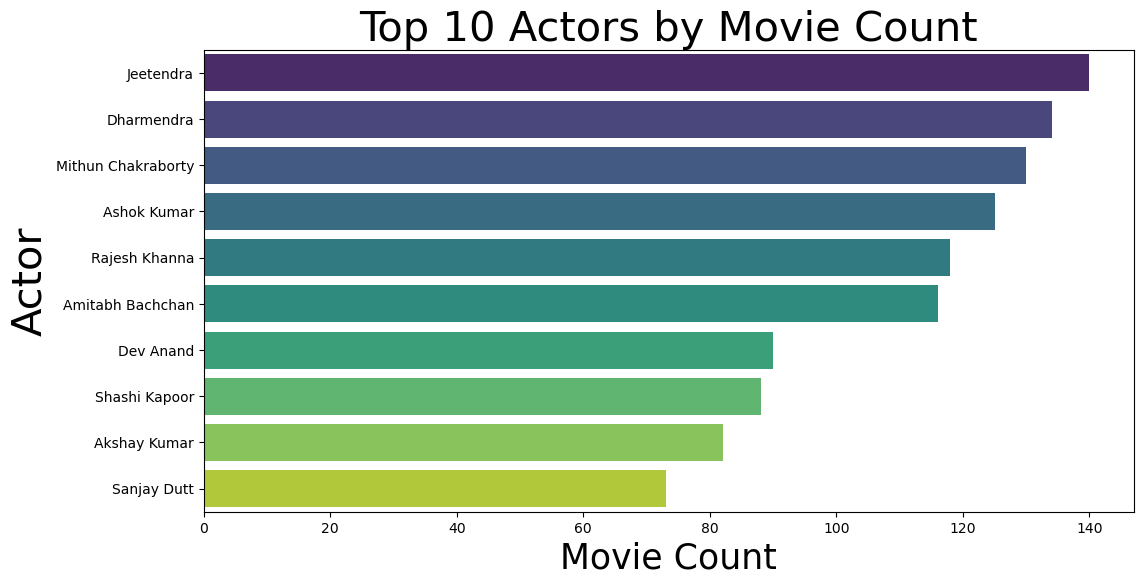

In [80]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_actors, x='MovieCount', y='Actor', orient='h', palette='viridis')
plt.title('Top 10 Actors by Movie Count', fontsize=30)
plt.xlabel('Movie Count', fontsize=25)
plt.ylabel('Actor', fontsize=30)
plt.show()


In [81]:
yearly_movie_counts = dataset['Year'].value_counts().reset_index()
yearly_movie_counts.columns = ['Year', 'MovieCount']

yearly_movie_counts = yearly_movie_counts.sort_values(by='Year')
print(yearly_movie_counts)

    Year  MovieCount
91  1917           1
88  1931           3
89  1932           2
86  1933           4
90  1934           2
..   ...         ...
1   2017         223
2   2018         214
0   2019         238
9   2020         157
49  2021          69

[92 rows x 2 columns]


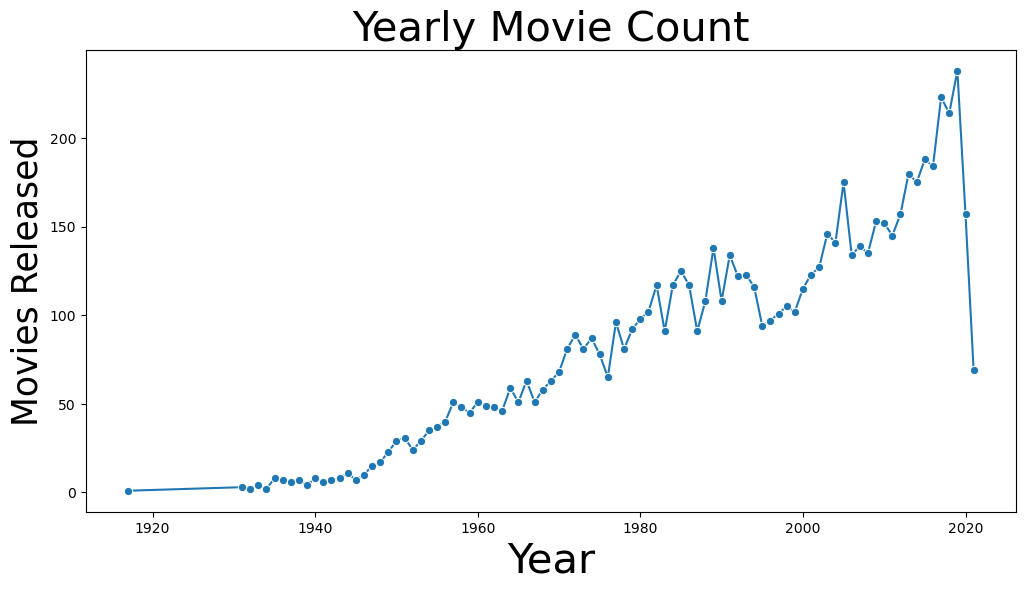

In [82]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_movie_counts, x='Year', y='MovieCount', marker='o')
plt.title('Yearly Movie Count', fontsize=30)
plt.xlabel('Year', fontsize=30)
plt.ylabel('Movies Released', fontsize=25)
plt.show()

In [83]:
filtered_df = dataset[(dataset['Rating'] >= 8) & (dataset['Votes'] > 10000)]
filtered_df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
75,3 Idiots,2009,170.0,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
173,A Wednesday,2008,104.0,"Action, Crime, Drama",8.1,75118,Neeraj Pandey,Anupam Kher,Naseeruddin Shah,Jimmy Sheirgill
732,Airlift,2016,130.0,"Drama, History",8.0,53897,Raja Menon,Akshay Kumar,Nimrat Kaur,Kumud Mishra
981,Anand,1971,122.0,"Drama, Musical",8.3,31937,Hrishikesh Mukherjee,Rajesh Khanna,Amitabh Bachchan,Sumita Sanyal
1009,Andaz Apna Apna,1994,160.0,"Action, Comedy, Romance",8.1,50810,Rajkumar Santoshi,Aamir Khan,Salman Khan,Raveena Tandon


C:\Users\laksh\AppData\Local\Temp\ipykernel_2432\3329323906.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=filtered_df, x='Name', y='Votes',dodge=False,width=0.5, palette='muted')
C:\Users\laksh\AppData\Local\Temp\ipykernel_2432\3329323906.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90 ,ha='right')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


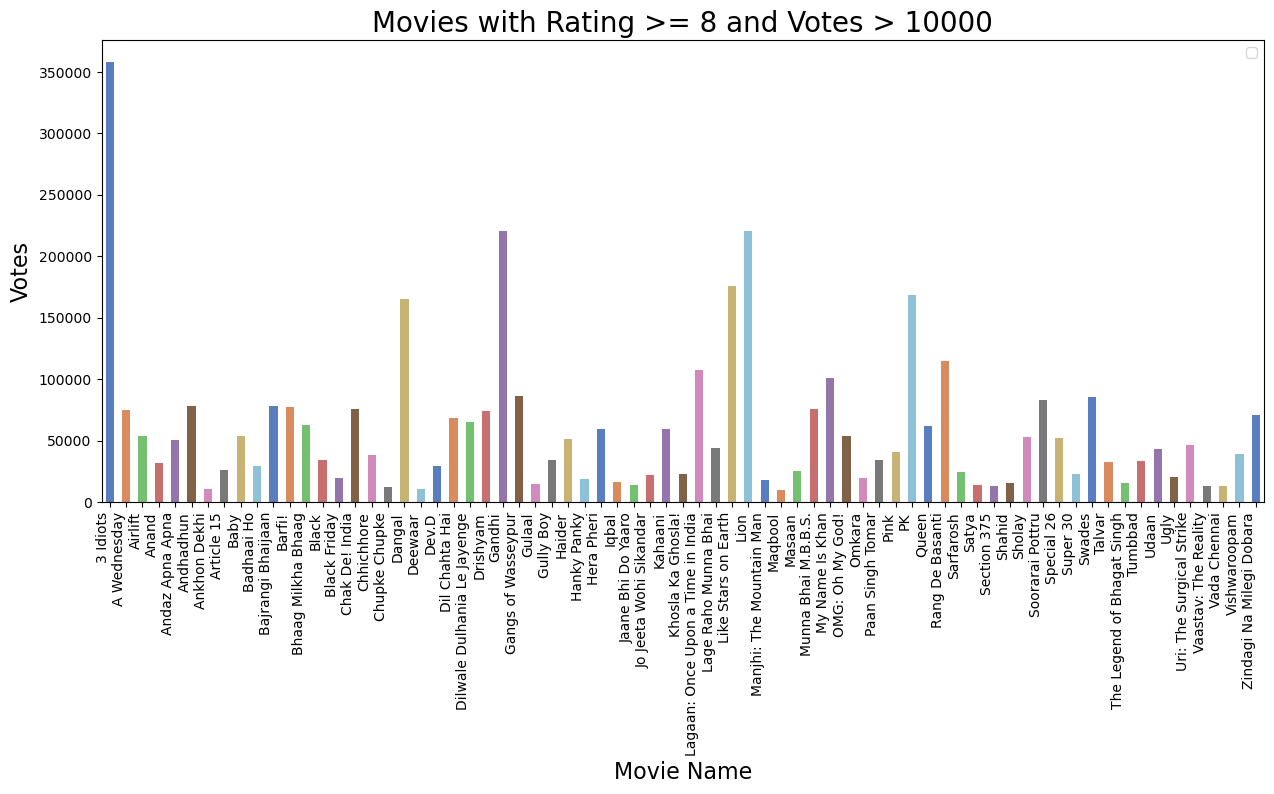

In [84]:

plt.figure(figsize=(15, 6))
ax = sns.barplot(data=filtered_df, x='Name', y='Votes',dodge=False,width=0.5, palette='muted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90 ,ha='right')
ax.legend(loc='upper right')
ax.set_xlabel('Movie Name', fontsize=16)
ax.set_ylabel('Votes',fontsize=16)
ax.set_title('Movies with Rating >= 8 and Votes > 10000',fontsize=20)
plt.show()

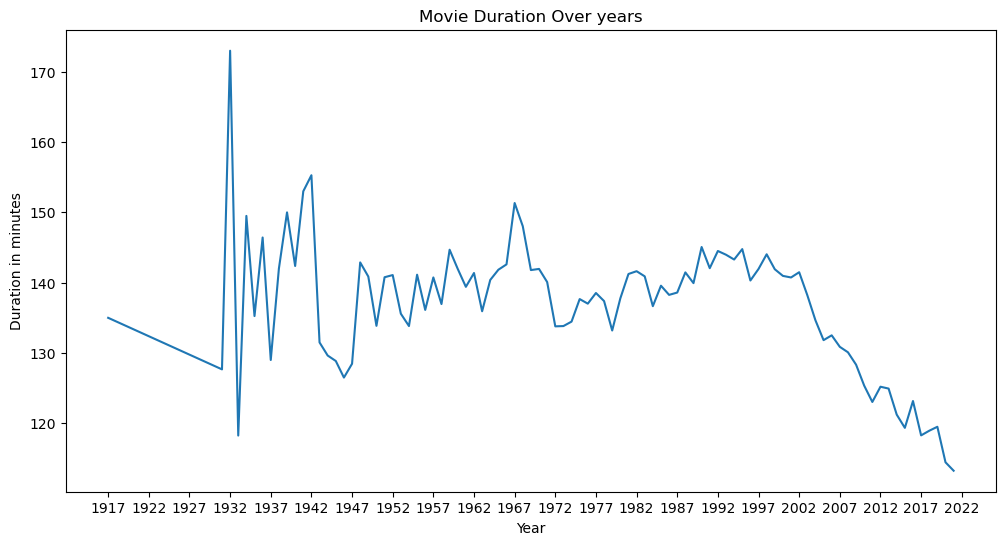

In [86]:
dataset['Duration'] = dataset['Duration'].astype(int)
dataset['Year'] = dataset['Year'].astype(int)

plt.figure(figsize=(12,6))
sns.lineplot(data=dataset, x='Year', y='Duration',errorbar=None)
plt.title('Movie Duration Over years')
plt.xlabel('Year')
plt.ylabel('Duration in minutes')
plt.xticks(np.arange(1917,2023,5))

plt.show()

In [87]:
dataset['Genre'] = dataset['Genre'].str.split(',')
genre_df = dataset.explode('Genre')
print(genre_df)
     
     

                                     Name  Year  Duration     Genre  Rating  \
1      #Gadhvi (He thought he was Gandhi)  2019       109     Drama     7.0   
3                                 #Yaaram  2019       110    Comedy     4.4   
3                                 #Yaaram  2019       110   Romance     4.4   
5                    ...Aur Pyaar Ho Gaya  1997       147    Comedy     4.7   
5                    ...Aur Pyaar Ho Gaya  1997       147     Drama     4.7   
...                                   ...   ...       ...       ...     ...   
15504                 Zulm Ko Jala Doonga  1988       135    Action     4.6   
15505                               Zulmi  1999       129    Action     4.5   
15505                               Zulmi  1999       129     Drama     4.5   
15508                        Zulm-O-Sitam  1998       130    Action     6.2   
15508                        Zulm-O-Sitam  1998       130     Drama     6.2   

       Votes       Director           Actor 1      

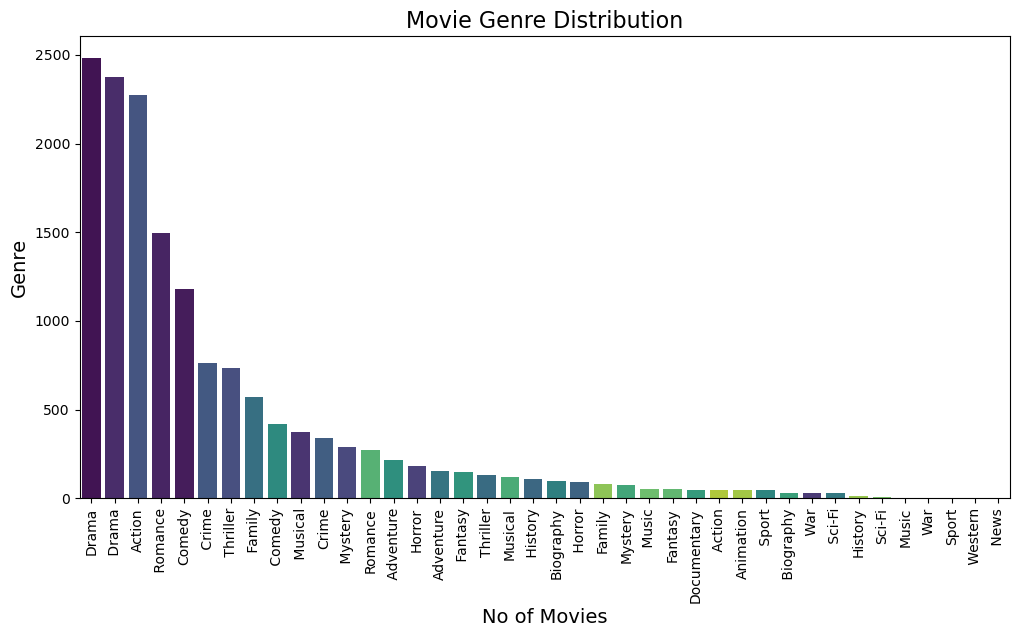

In [89]:
plt.figure(figsize=(12, 6))
sns.countplot(data=genre_df, x='Genre', hue='Genre', order=genre_df['Genre'].value_counts().index, palette='viridis', legend=False)
plt.title('Movie Genre Distribution', fontsize=16)
plt.xlabel('No of Movies', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(rotation=90)
plt.show()


In [90]:
average_rating_by_genre = genre_df.groupby('Genre')['Rating'].mean().reset_index()
average_rating_by_genre = average_rating_by_genre.sort_values(by='Rating', ascending=False)
print(average_rating_by_genre)
     


          Genre    Rating
13         News  8.000000
26  Documentary  7.587755
32        Music  7.250000
2     Biography  6.845161
8       History  6.825234
23    Biography  6.676289
30      History  6.630769
36       Sci-Fi  6.460000
16        Sport  6.406667
29      Fantasy  6.246154
11      Musical  6.209409
6        Family  6.192995
27        Drama  6.166626
18          War  6.146667
21    Adventure  6.089744
28       Family  6.027500
33      Musical  6.010000
25        Crime  6.009649
10        Music  5.994340
22    Animation  5.960000
5         Drama  5.802950
24       Comedy  5.801952
37        Sport  5.800000
12      Mystery  5.794845
14      Romance  5.784425
34      Mystery  5.782667
7       Fantasy  5.671333
1     Adventure  5.636697
0        Action  5.625000
4         Crime  5.593856
17     Thriller  5.575716
35      Romance  5.542435
3        Comedy  5.519664
20       Action  5.421919
38     Thriller  5.280000
19      Western  5.250000
15       Sci-Fi  5.065517
9        Hor

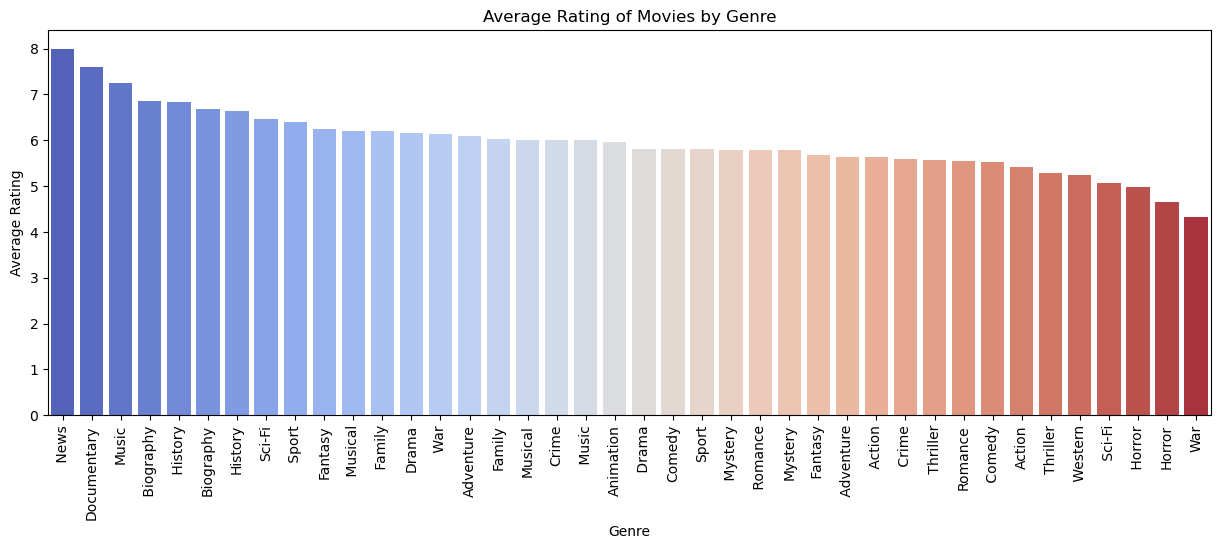

In [91]:
plt.figure(figsize=(15, 5))
sns.barplot(data=average_rating_by_genre, x='Genre', y='Rating', hue='Genre', palette='coolwarm', legend=False)
plt.title('Average Rating of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()


In [93]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

trans_data = dataset.drop(['Name'],axis=1)

trans_data['Director'] = labelencoder.fit_transform(dataset['Director'])
trans_data['Actor 1'] = labelencoder.fit_transform(dataset['Actor 1'])
trans_data['Actor 2'] = labelencoder.fit_transform(dataset['Actor 2'])
trans_data['Actor 3'] = labelencoder.fit_transform(dataset['Actor 3'])

trans_data['Genre'] = labelencoder.fit_transform(dataset['Genre'].apply(lambda x:','.join(x)))

trans_data.head()


,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,252,7.0,8,755,1686,2725,373
3,2019,110,205,4.4,35,1637,1500,865,2543
5,1997,147,175,4.7,827,1881,481,84,2422
6,2005,142,315,7.4,1086,2486,878,1346,2996
8,2012,82,351,5.6,326,161,2385,1416,1189


In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc_data = scaler.fit_transform(trans_data)
sc_df = pd.DataFrame(sc_data, columns=trans_data.columns)

sc_df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.980769,0.293333,0.607229,0.662921,0.000005,0.255499,0.698426,0.979511,0.123102
1,0.980769,0.296667,0.493976,0.370787,0.000051,0.553976,0.621375,0.310927,0.839274
2,0.769231,0.420000,0.421687,0.404494,0.001390,0.636548,0.199254,0.030194,0.799340
3,0.846154,0.403333,0.759036,0.707865,0.001828,0.841286,0.363712,0.483825,0.988779
4,0.913462,0.203333,0.845783,0.505618,0.000543,0.054484,0.987987,0.508986,0.392409


In [96]:
corr_df = trans_data.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)

Rating      1.000000
Votes       0.134655
Genre       0.122565
Actor 2     0.038852
Actor 3     0.031550
Actor 1     0.025089
Duration   -0.001801
Director   -0.003678
Year       -0.194990
Name: Rating, dtype: float64

<Axes: >

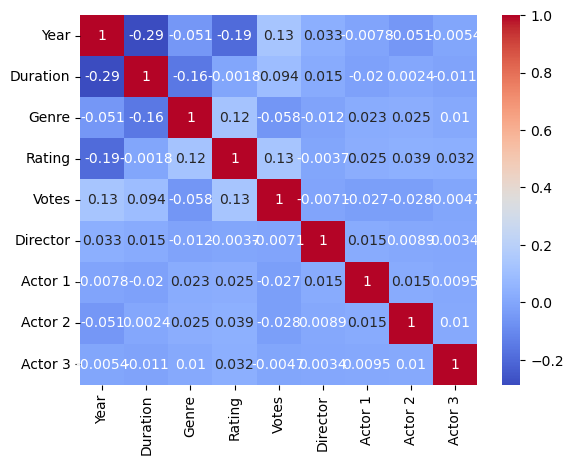

In [97]:
sns.heatmap(corr_df, annot=True, cmap='coolwarm')

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [99]:
X = trans_data.drop(['Rating'],axis=1)
y = trans_data['Rating']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
     

LinearRegression()

In [101]:
LinearRegression()

LinearRegression()

In [102]:
import numpy as np
from sklearn.linear_model import LinearRegression

feature_names = ['feature1', 'feature2', ...]

X_test = np.array(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

model.feature_names = feature_names


y_pred = model.predict(X_test)
print(y_pred)


[6.38173569 6.27438422 6.24148256 ... 5.6990634  6.25823896 6.09526622]


C:\Users\laksh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [103]:
print('R2 score:',r2_score(y_test, y_pred))
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))

R2 score: 0.08483347672034802
Mean Squared Error: 1.6972873264362
Mean Absolute Error: 1.0286370452288054


In [104]:
print(y_test)

6241     7.4
3321     4.9
6117     6.5
5975     5.7
6653     7.0
        ... 
14566    3.5
10966    5.2
10168    2.7
14796    4.9
2785     8.0
Name: Rating, Length: 2268, dtype: float64
